In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import tree

In [35]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed(4)) 

In [72]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [73]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [74]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)  
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [75]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred_tr):.2f}')

Accuracy : 0.98


In [76]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

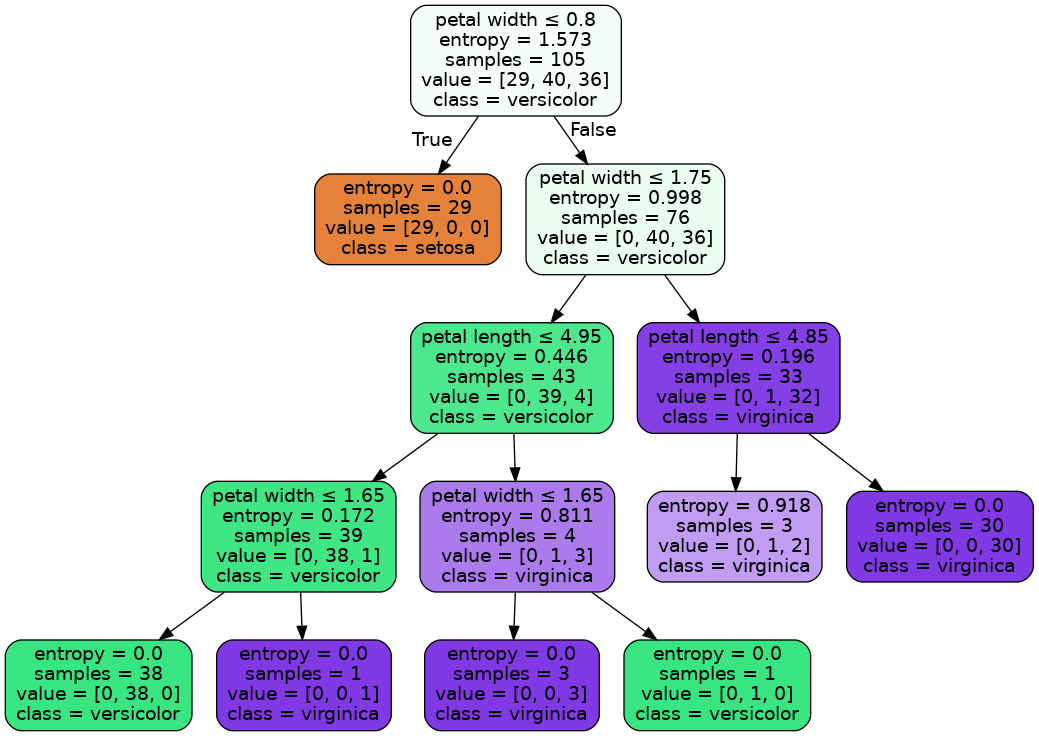

In [64]:
dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True,
                          rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())